# Assignment 1 Text Analysis


## Setting up the project

### Importing Libraries

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string



In [406]:
nltk.download('punkt_tab')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Accessing the data

In [407]:

file_path = "Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0], engine = "openpyxl")
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1], engine = "openpyxl")
cc_df = pd.read_excel(file_path, sheet_name=sheets[4], engine = "openpyxl")
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2], engine = "openpyxl")
st_df = pd.read_excel(file_path, sheet_name=sheets[5], engine = "openpyxl")
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3], engine = "openpyxl")
tt_df = pd.read_excel(file_path, sheet_name=sheets[6], engine = "openpyxl")


In [408]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
]

for name, df in df_list:
    print(f"{name} columns: {df.columns.tolist()}")


occupation_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'ANZSCO Description']
cc_desc_df columns: ['Core Competency', 'Core Competency Description', 'Score', 'Proficiency Level', 'Anchor Value']
cc_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level', 'Anchor Value']
st_hier_df columns: ['Specialist Task', 'Specialist Cluster', 'Cluster Family', 'Skill Statement']
st_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Specialist Task', '% of time spent on task', 'Emerging/\nTrending Flag', 'Specialist Cluster', ' % of time spent on cluster', 'Cluster Family', '% of time spent on family', 'Skills Statement']
tt_hier_df columns: ['Technology Tool Category', 'Technology Tool Category Description', 'Technology Tool', 'Technology Tool Description', 'Technology Tool Extended Description']
tt_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Pro

### Basic Data Pre-processing for NLP project

In [409]:
"""for name, df in df_list:
    df[:] = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

"""

'for name, df in df_list:\n    df[:] = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)\n\n'

In [410]:
"""stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    if isinstance(text, str):
        return " ".join(word for word in text.split() if word.lower() not in stop_words)
    return text


for name, df in df_list:
    df[:] = df.applymap(remove_stopwords)"""

'stop_words = set(stopwords.words("english"))\n\ndef remove_stopwords(text):\n    if isinstance(text, str):  \n        return " ".join(word for word in text.split() if word.lower() not in stop_words)\n    return text  \n\n\nfor name, df in df_list:\n    df[:] = df.applymap(remove_stopwords)'

In [411]:
"""
import re

# Iterate through each DataFrame in df_list
for name, df in df_list:
    df.update(df.applymap(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x) if isinstance(x, str) else x))
"""

"\nimport re\n\n# Iterate through each DataFrame in df_list\nfor name, df in df_list:\n    df.update(df.applymap(lambda x: re.sub(r'[^A-Za-z0-9\\s]', '', x) if isinstance(x, str) else x))\n"

In [412]:
"""for name, df in df_list:
    df.update(df.applymap(lambda x: x.strip() if isinstance(x, str) else x))"""

'for name, df in df_list:\n    df.update(df.applymap(lambda x: x.strip() if isinstance(x, str) else x))'

## Initial Exploratory Data Analysis

### EDA - Occupation List Dataframe

In [413]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [414]:
print("There are",occupation_df['Occupation Type'].nunique(), "types of Occupations listed in ACS")
print('These occupations are:', occupation_df['Occupation Type'].unique())

There are 5 types of Occupations listed in ACS
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation'
 'NEC Category']


In [415]:
print("There are",occupation_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 1178 different occupations listed


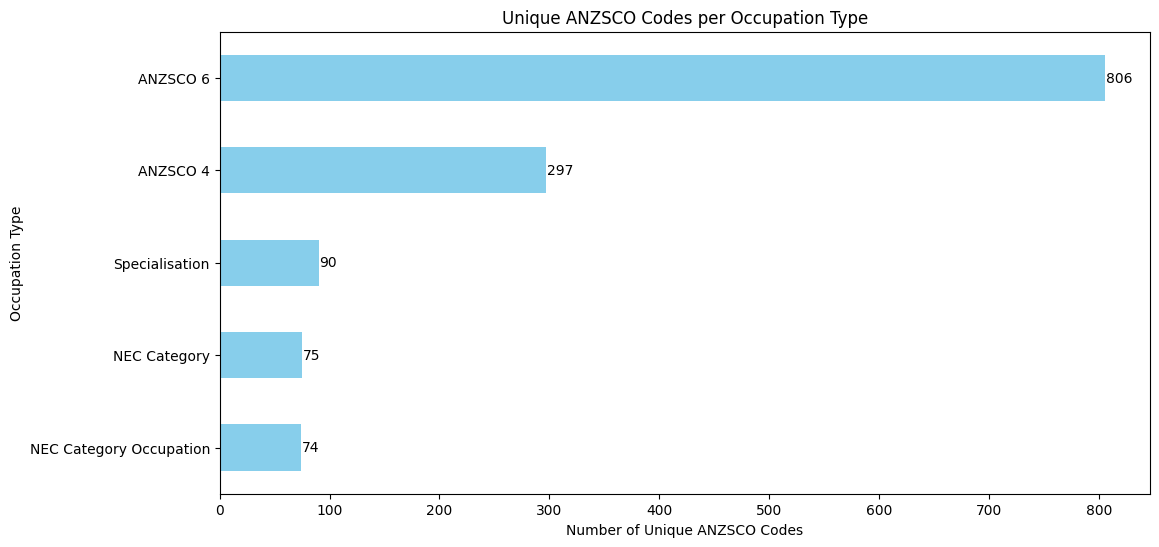

In [416]:
import matplotlib.pyplot as plt


occupation_counts = occupation_df.groupby('Occupation Type')['ANZSCO Code'].nunique()


occupation_counts = occupation_counts.sort_values()


plt.figure(figsize=(12, 6))
ax = occupation_counts.plot(kind='barh', color='skyblue')


for index, value in enumerate(occupation_counts):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=10)

plt.xlabel("Number of Unique ANZSCO Codes")
plt.ylabel("Occupation Type")
plt.title("Unique ANZSCO Codes per Occupation Type")
plt.show()


### EDA - Core Competency Dataframes
1. Core Competency Description
2. Core Competency Data

In [417]:
cc_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [418]:
print(cc_desc_df['Core Competency'].nunique())
print(cc_desc_df['Core Competency'].unique())

10
['Digital engagement' 'Initiative and innovation' 'Learning' 'Numeracy'
 'Oral communication' 'Planning and organising' 'Problem solving'
 'Reading' 'Teamwork' 'Writing']


In [419]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


In [420]:
print("There are",cc_df['Occupation Type'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_df['Occupation Type'].unique())
print("There are",cc_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['ANZSCO 6' 'ANZSCO 4']
There are 1101 different occupations listed


In [421]:
cc_counts = cc_df.groupby("ANZSCO Code")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes have more or less than 10 core competencies.")


✅ All ANZSCO Codes have exactly 10 core competencies.


### EDA - Specialist Task Dataframes
1. Specialist Task Hierarchy
2. Specialist Task Data

In [422]:
print("The number of Specialist Task in ASC data are:", st_hier_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_hier_df['Specialist Cluster'].nunique())
print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 272
The number of Cluster Families in ASC data are: 31


In [423]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [424]:
print("There are",st_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_df['Occupation Type'].unique())
print("There are",st_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation']
There are 1177 different occupations listed


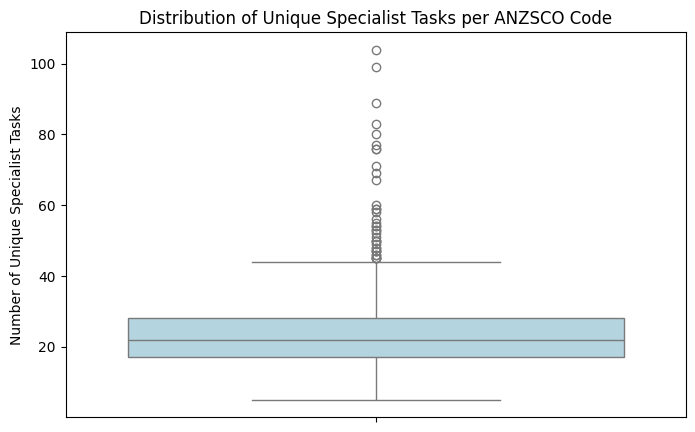

In [425]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby("ANZSCO Code")["Specialist Task"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=st_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Specialist Tasks")
plt.title("Distribution of Unique Specialist Tasks per ANZSCO Code")

# Show plot
plt.show()


In [426]:
# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = st_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262113                              Systems Administrator   
1       313113                                  Web Administrator   
2       249212                    Dance Teacher (Private Tuition)   
3         2412                            Primary School Teachers   
4       241213                             Primary School Teacher   
5       263111              Computer Network and Systems Engineer   
6       322313                               Welder (First Class)   
7         2413  Middle School Teachers / Intermediate School T...   
8       241311  Middle School Teacher / Intermediate School Te...   
9       262111                             Database Administrator   

   Specialist Task  
0               45  
1               45  
2               44  
3               43  
4               43  
5               41  
6               41  
7               40  
8               40  
9               40  


In [427]:
import numpy as np

# Get counts of unique specialist tasks per ANZSCO Code
st_counts = st_df.groupby("ANZSCO Code")["Specialist Task"].nunique()

# Calculate IQR (Interquartile Range) to detect outliers
Q1 = np.percentile(st_counts, 25)  # First quartile (25th percentile)
Q3 = np.percentile(st_counts, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outliers as values greater than Q3 + 1.5 * IQR
outlier_threshold = Q3 + 1.5 * IQR
outliers = st_counts[st_counts > outlier_threshold].reset_index()

# Merge with ANZSCO Title to show meaningful names
top_outliers = outliers.merge(st_df[["ANZSCO Code", "ANZSCO Title"]].drop_duplicates(), on="ANZSCO Code")

# Sort by number of specialist tasks and display top 10
top_outliers = top_outliers.sort_values(by="Specialist Task", ascending=False).head(10)
print(top_outliers)


     ANZSCO Code  Specialist Task  \
56        233999              104   
55        233999              104   
50        233999              104   
51        233999              104   
52        233999              104   
53        233999              104   
54        233999              104   
57        233999              104   
146       399999               99   
144       399999               99   

                                          ANZSCO Title  
56                                     Safety Engineer  
55                             Product Design Engineer  
50                                   Acoustic Engineer  
51                                Calibration Engineer  
52                                  Corrosion Engineer  
53                                Fire Safety Engineer  
54                               Mechatronics Engineer  
57   Test and Activation Engineer (Naval Shipbuilding)  
146                                   Pearl Technician  
144                   

### EDA - Technology Tools Dataframes
1. Technology Tools Hierarchy
2. Technology Tools Data

In [428]:
tt_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [429]:
print("The number of Tech Tool Category in ASC data are:", tt_hier_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_hier_df['Technology Tool'].nunique())
#print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


In [430]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


In [431]:
print("There are",tt_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_df['Occupation Type'].unique())
print("There are",tt_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'NEC Category Occupation' 'Specialisation']
There are 1042 different occupations listed


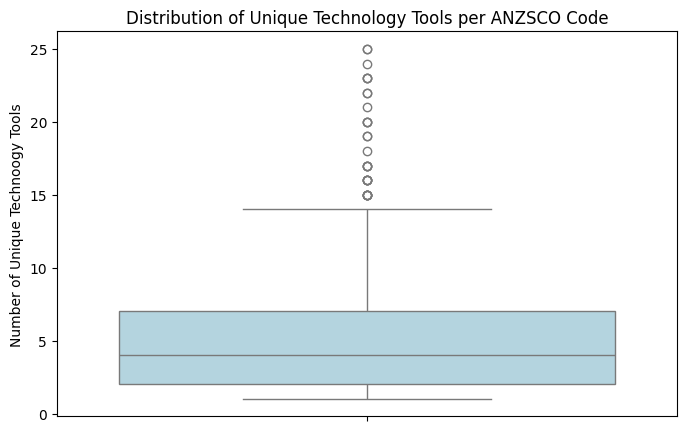

In [432]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby("ANZSCO Code")["Technology Tool"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=tt_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Technoogy Tools")
plt.title("Distribution of Unique Technology Tools per ANZSCO Code")

# Show plot
plt.show()


In [433]:
# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = tt_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262111                             Database Administrator   
1         2611                  ICT Business and Systems Analysts   
2       262113                              Systems Administrator   
3       263111              Computer Network and Systems Engineer   
4       263212                               ICT Support Engineer   
5         2621  Database and Systems Administrators, and ICT S...   
6       135199                                    Network Manager   
7       261111                               ICT Business Analyst   
8       263112                              Network Administrator   
9       261313                                  Software Engineer   

   Technology Tool  
0               25  
1               24  
2               23  
3               23  
4               23  
5               21  
6               20  
7               20  
8               20  
9               19  


In [434]:
import numpy as np

# Get counts of unique specialist tasks per ANZSCO Code
tt_counts = tt_df.groupby("ANZSCO Code")["Technology Tool"].nunique()

# Calculate IQR (Interquartile Range) to detect outliers
Q1 = np.percentile(tt_counts, 25)  # First quartile (25th percentile)
Q3 = np.percentile(tt_counts, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outliers as values greater than Q3 + 1.5 * IQR
outlier_threshold = Q3 + 1.5 * IQR
outliers = tt_counts[tt_counts > outlier_threshold].reset_index()

# Merge with ANZSCO Title to show meaningful names
top_outliers = outliers.merge(tt_df[["ANZSCO Code", "ANZSCO Title"]].drop_duplicates(), on="ANZSCO Code")

# Sort by number of specialist tasks and display top 10
top_outliers = top_outliers.sort_values(by="Technology Tool", ascending=False).head(10)
print(top_outliers)


    ANZSCO Code  Technology Tool  \
26       233999               25   
29       233999               25   
23       233999               25   
42       262111               25   
24       233999               25   
27       233999               25   
28       233999               25   
25       233999               25   
30       233999               25   
2          2611               24   

                                         ANZSCO Title  
26                               Fire Safety Engineer  
29                                    Safety Engineer  
23                                  Acoustic Engineer  
42                             Database Administrator  
24                               Calibration Engineer  
27                              Mechatronics Engineer  
28                            Product Design Engineer  
25                                 Corrosion Engineer  
30  Test and Activation Engineer (Naval Shipbuilding)  
2                   ICT Business and System

## Merging Relevent Dataframes
1. This helps segmentise the project into 3 different approaches to answer multiple ASC related question

In [435]:
def merge_all_dataframes(df1, df2, df3, col_1, col_2):
    merged_df = df3.merge(df1, on=col_1, how="left")
    merged_df = merged_df.merge(df2, on=col_2, how="left")
    print("\nFinal Merged Dataset Sample:")
    print(merged_df.head())
    return merged_df


#c_merged_df = merge_all_dataframes(cc_desc_df, occupation_df, cc_df, "Core Competency", "ANZSCO Code")
tt_merged_df = merge_all_dataframes(tt_df, occupation_df, tt_hier_df, "Technology Tool", "ANZSCO Code")
st_merged_df = merge_all_dataframes(st_hier_df, occupation_df, st_df, "Specialist Task", "ANZSCO Code")




Final Merged Dataset Sample:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                   

In [436]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12910 non-null  object
 1   Technology Tool Category Description  12910 non-null  object
 2   Technology Tool                       12910 non-null  object
 3   Technology Tool Description           12910 non-null  object
 4   Technology Tool Extended Description  12910 non-null  object
 5   Occupation Type_x                     12910 non-null  object
 6   ANZSCO Code                           12910 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12910 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  Occupation Type_y                     12905 non-null  object
 11  Sub-Profile Code_y          

In [437]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [438]:
def merge_cc_df(df1, df2, df3):
    merged_df = pd.merge(df1, df3, on=["ANZSCO Code", "ANZSCO Title"], how="left")

    print("\nStep 1: Core Competencies merged with Occupation Data")
    print(merged_df.head())
    merged_df = pd.merge(merged_df, df2, on=["Core Competency", "Score"], how="left", suffixes=("", "_desc"))

    print("\nStep 2: Final Merged Dataset with Descriptions")
    print(merged_df.head())

    return merged_df


cc_merged_df = merge_cc_df(cc_df, cc_desc_df, occupation_df)


Step 1: Core Competencies merged with Occupation Data
  Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      In

In [439]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

### Tech Tools Merged Analysis

In [440]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12910 non-null  object
 1   Technology Tool Category Description  12910 non-null  object
 2   Technology Tool                       12910 non-null  object
 3   Technology Tool Description           12910 non-null  object
 4   Technology Tool Extended Description  12910 non-null  object
 5   Occupation Type_x                     12910 non-null  object
 6   ANZSCO Code                           12910 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12910 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  Occupation Type_y                     12905 non-null  object
 11  Sub-Profile Code_y          

In [441]:
tt_merged_df.drop(columns=[ "Sub-Profile Code_y", "Occupation Type_y" , "ANZSCO Title_y" ], inplace=True)
tt_merged_df.columns

Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description', 'Occupation Type_x',
       'ANZSCO Code', 'Sub-Profile Code_x', 'ANZSCO Title_x',
       'Emerging/Trending Flag', 'ANZSCO Description'],
      dtype='object')

In [442]:
print("There are",tt_merged_df['Occupation Type_x'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_merged_df['Occupation Type_x'].unique())
print("There are",tt_merged_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'NEC Category Occupation' 'Specialisation']
There are 1042 different occupations listed


In [443]:
print("The number of Tech Tool Category in ASC data are:", tt_merged_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_merged_df['Technology Tool'].nunique())
#print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


In [444]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12910 non-null  object
 1   Technology Tool Category Description  12910 non-null  object
 2   Technology Tool                       12910 non-null  object
 3   Technology Tool Description           12910 non-null  object
 4   Technology Tool Extended Description  12910 non-null  object
 5   Occupation Type_x                     12910 non-null  object
 6   ANZSCO Code                           12910 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12910 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  ANZSCO Description                    12905 non-null  object
dtypes: int64(1), object(10)
memo

In [445]:
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description
0,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2123,NaN,"Film, Television, Radio and Stage Directors",NaN,"Film, Television, Radio and Stage Directors di..."
1,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2124,NaN,Journalists and Other Writers,NaN,Journalists and Other Writers research and com...
2,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212113,NaN,Radio Presenter,NaN,"Prepares and presents news, sports or other in..."
3,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212312,NaN,"Director (Film, Television, Radio or Stage)",NaN,"Interprets and approves selection of scripts, ..."
4,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212315,NaN,Program Director (Television or Radio),NaN,Compiles and directs programs for television o...


In [446]:
tt_merged_df.sort_values(by="ANZSCO Code", inplace=True)
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description
10475,"Project, process, and risk management systems","Systems to manage projects, risks, regulatory ...",Project management software,"Software for planning, documenting, and managi...",Project management software incorporates softw...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...
2017,Data analysis and reporting platforms,Software for data analysis and produce electro...,Statistical and data analysis software,Software used to support the process of analys...,Statistical and data analysis software encompa...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...
9153,Payroll and human resource management platforms,Systems to undertake human resource management...,Human resources software,Software and systems used to manage employee a...,Human resources software encompasses software ...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...
447,Communication technologies,"Data, voice and/or video communication platforms",Audio/video conferencing software,Software for collaboration using video or audi...,Audio/video conferencing software enables peop...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...
5152,Graphic design and imagery technologies,Software for graphic design and photographic e...,Flow chart and diagram software,Software used to create 2D and 3D diagrams and...,Flow chart and diagram software incorporates s...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...


### Specialised Task Merged Analysis

In [447]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [448]:
st_merged_df.drop(columns=[ "Sub-Profile Code_y", "Specialist Cluster_y", "Cluster Family_y" , "ANZSCO Title_y", "Occupation Type_y", "Skill Statement" ], inplace=True)
st_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title_x', 'Specialist Task', '% of time spent on task',
       'Emerging/\nTrending Flag', 'Specialist Cluster_x',
       ' % of time spent on cluster', 'Cluster Family_x',
       '% of time spent on family', 'Skills Statement', 'ANZSCO Description'],
      dtype='object')

In [449]:
print("The number of Specialist Task in ASC data are:", st_merged_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_merged_df['Specialist Cluster_x'].nunique())
print("The number of Cluster Families in ASC data are:", st_merged_df['Cluster Family_x'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 272
The number of Cluster Families in ASC data are: 31


In [450]:
print("There are",st_merged_df['Occupation Type_x'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_merged_df['Occupation Type_x'].unique())
print("There are",st_merged_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation']
There are 1177 different occupations listed


In [451]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  ANZSCO Description           67772 non-null  object 
dtypes: float64(3), i

In [452]:
st_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Specialist Task,% of time spent on task,Emerging/\nTrending Flag,Specialist Cluster_x,% of time spent on cluster,Cluster Family_x,% of time spent on family,Skills Statement,ANZSCO Description
0,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct or manage financial activities or opera...,0.1302,NaN,"Manage, monitor and undertake financial activi...",0.1644,Business operations and financial activities,0.5322,Direct and oversee the financial operations of...,Chief Executives and Managing Directors determ...
1,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct department or organisational activities,0.1117,Trending,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,Direct and oversee the activities of a work un...,Chief Executives and Managing Directors determ...
2,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Direct sales, marketing or customer service ac...",0.0808,NaN,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,"Direct and oversee the sales, marketing, or cu...",Chief Executives and Managing Directors determ...
3,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Communicate with others to arrange, coordinate...",0.0665,NaN,Communicate or collaborate with others,0.0750,Communication and collaboration,0.0890,"Coordinate with others in order to plan, organ...",Chief Executives and Managing Directors determ...
4,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Analyse data to assess operational or project ...,0.0651,NaN,Use data to inform operational decisions,0.1009,"Data, analytics, and databases",0.1370,Analyse qualitative and quantitative data aris...,Chief Executives and Managing Directors determ...


### Core Competencies Merged Analysis

In [453]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

In [454]:
cc_merged_df.drop(columns=[ "Sub-Profile Code_y" , "Occupation Type_y"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description',
       'Proficiency Level_desc', 'Anchor Value_desc'],
      dtype='object')

In [455]:
cc_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description,Proficiency Level_desc,Anchor Value_desc
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,Build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...,Intermediate,Build and maintain an effective online profile...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,Negotiate a price and sales terms then prepare...,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei...",High,Negotiate a price and sales terms then prepare...
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,Learn a new filing system that groups document...,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...,Intermediate,Learn a new filing system that groups document...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,Use a blood pressure machine and accurately re...,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...,Intermediate,Use a blood pressure machine and accurately re...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,Participate in a work meeting and ask appropri...,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...,Intermediate,Participate in a work meeting and ask appropri...


In [456]:
print(cc_merged_df['Core Competency'].nunique())
print(cc_merged_df['Core Competency'].unique())

10
['Digital engagement' 'Initiative and innovation' 'Learning' 'Numeracy'
 'Oral communication' 'Planning and organising' 'Problem solving'
 'Reading' 'Teamwork' 'Writing']


In [457]:
print("There are",cc_merged_df['Occupation Type_x'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_merged_df['Occupation Type_x'].unique())
print("There are",cc_merged_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['ANZSCO 6' 'ANZSCO 4']
There are 1101 different occupations listed


In [458]:
cc_counts = cc_merged_df.groupby("ANZSCO Code")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes have more or less than 10 core competencies.")


✅ All ANZSCO Codes have exactly 10 core competencies.


## NLP Pipeline

### Tech Tools

"""Technology Tool Category → Category of technology tools
Technology Tool Category Description → Describes tool category
Technology Tool → Actual tool name
Technology Tool Description → Short description
Technology Tool Extended Description → More details on tool
ANZSCO Title_x → Occupation title
ANZSCO Description → Description of the occupation"""

In [459]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12910 entries, 10475 to 8650
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12910 non-null  object
 1   Technology Tool Category Description  12910 non-null  object
 2   Technology Tool                       12910 non-null  object
 3   Technology Tool Description           12910 non-null  object
 4   Technology Tool Extended Description  12910 non-null  object
 5   Occupation Type_x                     12910 non-null  object
 6   ANZSCO Code                           12910 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12910 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  ANZSCO Description                    12905 non-null  object
dtypes: int64(1), object(10)
memory

#### TT Desc

In [460]:
!python3 -m spacy download en_core_web_sm
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [461]:
"""
cc_merged_df.to_excel("cc_merged_df.xlsx", index=False, header=False)
"""

'\ncc_merged_df.to_excel("cc_merged_df.xlsx", index=False, header=False)\n'

In [462]:
tt_data = tt_merged_df.copy()

In [463]:
tt_data['Technology Tool Extended Description'][0]

'Collaborative news production platforms encompasses software and systems used by journalists and newsrooms to track the creation of new stories and produce news bulletins. This technology tool is used by newspapers, radio stations, and TV stations, and online news platforms.'

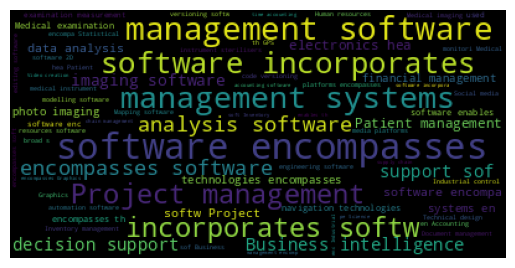

In [464]:
ext_desc_text = tt_data['Technology Tool Extended Description'].to_string()

#create word tokens
tokenized_words=word_tokenize(ext_desc_text)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(ext_desc_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

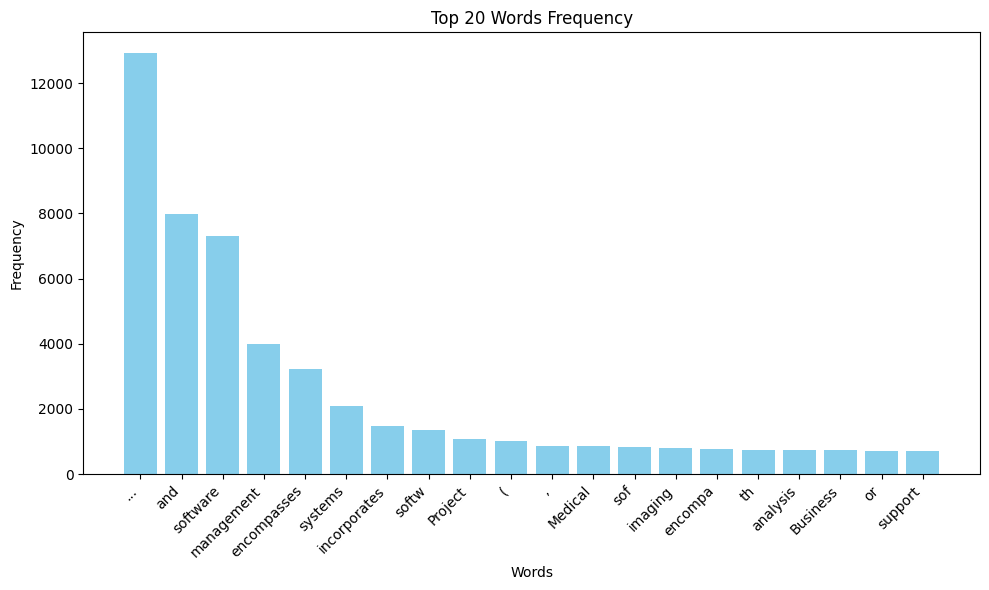

In [465]:


# Example text from 'Technology Tool Extended Description'
ext_desc_text = tt_data['Technology Tool Extended Description'].to_string()

# Tokenize the text
tokens = word_tokenize(ext_desc_text)  # Convert to lowercase


# Count word frequencies
word_counts = Counter(tokens)

# Get the most common words (top 20)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words Frequency')
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


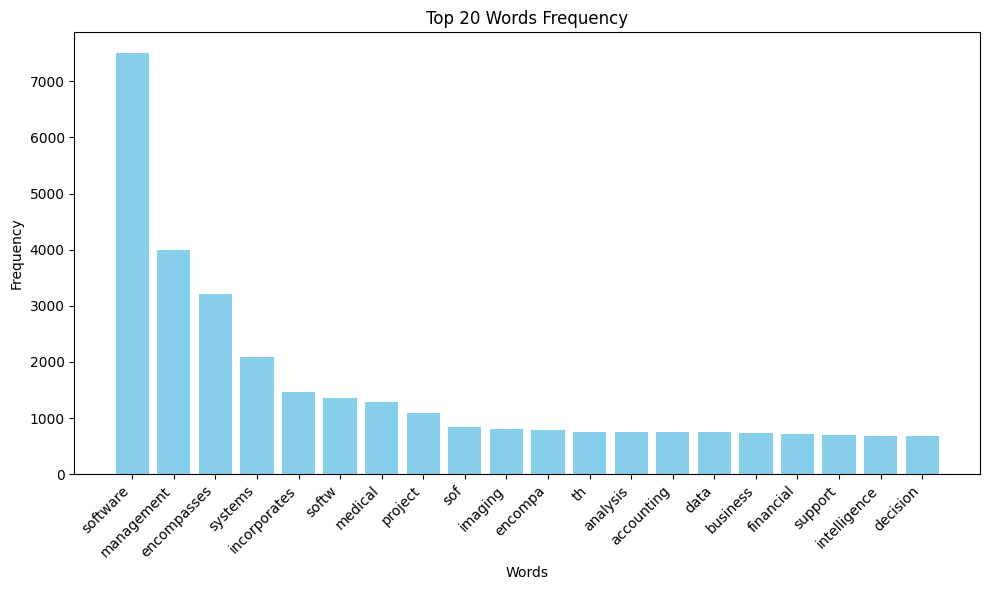

In [466]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Example text from 'Technology Tool Extended Description'
ext_desc_text = tt_data['Technology Tool Extended Description'].to_string()

# Tokenize the text
tokens = word_tokenize(ext_desc_text.lower())  # Convert to lowercase

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common words (top 20)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words Frequency')
plt.tight_layout()
plt.show()


In [467]:
filtered_tokens_length = len(filtered_tokens)
print(f"Number of filtered tokens: {filtered_tokens_length}")


Number of filtered tokens: 63395


In [468]:
ccc

NameError: name 'ccc' is not defined

In [ ]:
from nltk import ngrams
from collections import Counter
import re

def get_top_ngrams(text, n, top_k):

    # Generate n-grams
    n_grams = list(ngrams(text, n))

    # Count the frequency of each n-gram
    n_gram_freq = Counter(n_grams)

    # Get the top k most frequent n-grams
    top_n_grams = n_gram_freq.most_common(top_k)

    return top_n_grams


# Get top 10 bigrams
top_bigrams = get_top_ngrams(tokenized_words, 2, 10)

# Get top 10 trigrams
top_trigrams = get_top_ngrams(tokenized_words, 3, 10)

# Print results
print("Top 10 Bigrams:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")

print("\nTop 10 Trigrams:")
for trigram, count in top_trigrams:
    print(f"{trigram}: {count}")

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

def preprocess_text_column(column):
    stop_words = set(stopwords.words("english"))
    return column.dropna().str.strip().str.lower().apply(
        lambda text: " ".join([word for word in text.split() if word not in stop_words])
    )


In [ ]:
tt_data['Technology Tool Extended Description'] = preprocess_text_column(tt_data['Technology Tool Extended Description'])


In [ ]:
# converting series to string
ext_desc = tt_data['Technology Tool Extended Description'].to_string()

#create word tokens
tokenized_words=word_tokenize(ext_desc)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(ext_desc)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()